In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [4]:
train_data=pd.read_csv('data/train.csv.zip')

In [5]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
test_data=pd.read_csv('data/test.csv.zip')

In [7]:
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stop_word(text):
  words = [word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]
  return " ".join(words)

In [9]:
import string
def remove_punc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

In [10]:
import nltk
from nltk.stem.porter import PorterStemmer

def stem(text):
  porter_stemmer = PorterStemmer()
  words = [porter_stemmer.stem(word) for word in text.split()]
  return " ".join(words)

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
#https://www.kaggle.com/gtskyler/toxic-comments-bert

In [44]:
# train_data['comment_texxxt'] = train_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text)).map(lambda text: remove_stop_word(text))
# test_data['comment_texxxt'] = test_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text)).map(lambda text: remove_stop_word(text))
train_data['comment_texxxt'] = train_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text))
test_data['comment_texxxt'] = test_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text))

In [12]:
train_data['comment_texxt'] = train_data['comment_text'].map(lambda text: clean_text(text))
test_data['comment_texxt'] = test_data['comment_text'].map(lambda text: clean_text(text))

In [45]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_texxt,comment_texxxt
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i am s...,d aww he matches this background colour i am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...,hey man i am really not trying to edit war it ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cannot make any real suggestions on imp...,more i cannot make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and for the second time of asking when your vi...,and for the second time of asking when your vi...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you should be ashamed of yourself that is a ho...,you should be ashamed of yourself that is a ho...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm theres no actual article for prost...,spitzer umm theres no actual article for prost...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and it looks like it was actually you who put ...,and it looks like it was actually you who put ...


In [46]:
test_data

,id,comment_text,comment_texxt,comment_texxxt
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is imo,from rfc the title is fine as it is imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland,sources zawe ashton on lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...,if you have a look back at the source the info...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i do not anonymously edit articles at all,i do not anonymously edit articles at all
...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",i totally agree this stuff is nothing but too ...,i totally agree this stuff is nothing but too ...
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw from out field to home plate does it get...,throw from out field to home plate does it get...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories i see your changes a...,okinotorishima categories i see your changes a...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one of the founding nations of the eu germany ...,one of the founding nations of the eu germany ...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [47]:
# train_values_x = train_data['comment_texxt'].values
train_values_x = train_data['comment_texxxt'].values
train_values_y = train_data[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].values

In [48]:
train_values_x

array(['explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now 89 205 38 27',
       'd aww he matches this background colour i am seemingly stuck with thanks talk 21 51 january 11 2016 utc',
       'hey man i am really not trying to edit war it just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info',
       ...,
       'spitzer umm theres no actual article for prostitution ring crunch captain',
       'and it looks like it was actually you who put on the speedy to have the first version deleted now that i look at it',
       'and i really do not think you understand i came here and my idea was bad right away what kind of community goes you have bad ideas go away ins

In [49]:
train_values_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [50]:
# Split training, validation set
train_x, val_x, train_y, val_y = train_test_split(train_values_x, train_values_y, test_size=0.2, random_state=30)

In [51]:
val_x

array(['the syrian army is now advancing on aleppo with russian air cover this article is inherently unstable the article is also edited appropriately as the war progresses which just means it is unstable',
       'oppose there is zero benefit to readers particularly mobile users from ambiguous titles justin brown defensive lineman born 1982 gridiron football defensive end justin brown wide receiver born 1991 american football wide receiver and justin brown aquanaut american professional aquanaut are clearly titled per wp criteria at the moment leave well alone',
       'file skin of our teeth handbill jpg you have added a comment asking for the addition of a copyright status however i do not see any warnings attached to that image so i do not understand what is wrong with what i have already attached it is a low res version of a promotional item which comes under fair use it is also a photograph of something i own so it is also covered under fair use from that angle tell me that you t

In [52]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(127656,)
(127656, 6)
(31915,)
(31915, 6)


In [53]:
# Tokenize training data
vocab_len = 100000
tokenizer = Tokenizer(num_words = vocab_len, oov_token='<oov>')
# tokenizer.fit_on_texts(train_data['comment_texxt'])
tokenizer.fit_on_texts(train_data['comment_texxxt'])

In [54]:
# Encode training data sentences into sequences
train_seq = tokenizer.texts_to_sequences(train_x)

In [ ]:
# Get our training data word index
word_index = tokenizer.word_index

In [55]:
# Get max training sequence length
maxlen = max([len(x) for x in train_seq])
print(maxlen)

1403


In [56]:
# Pad the training sequences
train_pad = pad_sequences(train_seq, maxlen = maxlen,
                          padding = 'pre',
                          truncating='pre')

In [57]:
train_pad[0:2]

array([[   0,    0,    0, ...,  110,   33, 1293],
       [   0,    0,    0, ...,    8,   98,  289]], dtype=int32)

In [58]:
# print("\nTraining sequences:\n", train_seq)
# print("\nPadded training sequences:\n", train_pad)
print("\nPadded training shape:", train_pad.shape)
print("Training sequences data type:", type(train_seq))
print("Padded Training sequences data type:", type(train_pad))


Padded training shape: (127656, 1403)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [59]:
val_seq = tokenizer.texts_to_sequences(val_x)
val_pad = pad_sequences(val_seq, maxlen = maxlen,
                        padding = 'pre',
                        truncating='pre')

In [60]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

190214

In [ ]:
# !wget dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip

In [30]:
!unzip drive/MyDrive/crawl-300d-2M.vec.zip

Archive:  drive/MyDrive/crawl-300d-2M.vec.zip
  inflating: crawl-300d-2M.vec       


In [31]:
import io
from tqdm.auto import tqdm

print('loading word embeddings...')
embeddings_index = {}
f = io.open('crawl-300d-2M.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...


0it [00:00, ?it/s]

found 1999996 word vectors


In [32]:
# Prepare embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = vocab_size
embedding_matrix = np.zeros((nb_words, 300))

for word, i in tokenizer.word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
        
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 84211


In [33]:
def plot_learning_curve(history):
  plt.plot(history.history['loss'], label='training')
  plt.plot(history.history['val_loss'], label='validation')
  plt.legend()
  plt.show()

In [96]:
def CNN_model(kernel_num=32, output_dim=300, kernel_sizes=[1], pool_size=2):
  # Input
  input = tf.keras.Input(shape=(maxlen))
 
  # Embedding layers
  embedding = tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=output_dim, 
        input_length=maxlen
  )
 
  embed_out = embedding(input)
 
  # Convolutional layers (seperate convs for each word groups)
  conv_list = [tf.keras.layers.Conv1D(
      kernel_num, 
      k,
      activation='relu',
      padding='same') for k in kernel_sizes]
    
  conv_outs = [conv(embed_out) for conv in conv_list]
 
  # Max pooling layer (one for each convolutional layer)
  max_pool = tf.keras.layers.MaxPooling1D(pool_size=pool_size)
  pool_outs = [max_pool(conv_out) for conv_out in conv_outs]
 
  # Gobal pooling layer
  global_pool = tf.keras.layers.GlobalMaxPooling1D()
  global_outs = [global_pool(pool_out) for pool_out in pool_outs]
 
  # Concatenate layer
  concate = tf.keras.layers.Concatenate()(global_outs)
 
  # Flatten layer
  # flatten_out = tf.keras.layers.Flatten()(concate)
 
  # Drop out
  # drop_out = tf.keras.layers.Dropout(0.2)(flatten_out)
 
  # Output
  output = tf.keras.layers.Dense(6)(concate)
 
  # CNN model
  return tf.keras.Model(inputs=[input], outputs=[output])

In [97]:
cnn_128_3_4_5 = CNN_model(kernel_num=128, kernel_sizes=[3, 4, 5], pool_size=maxlen)

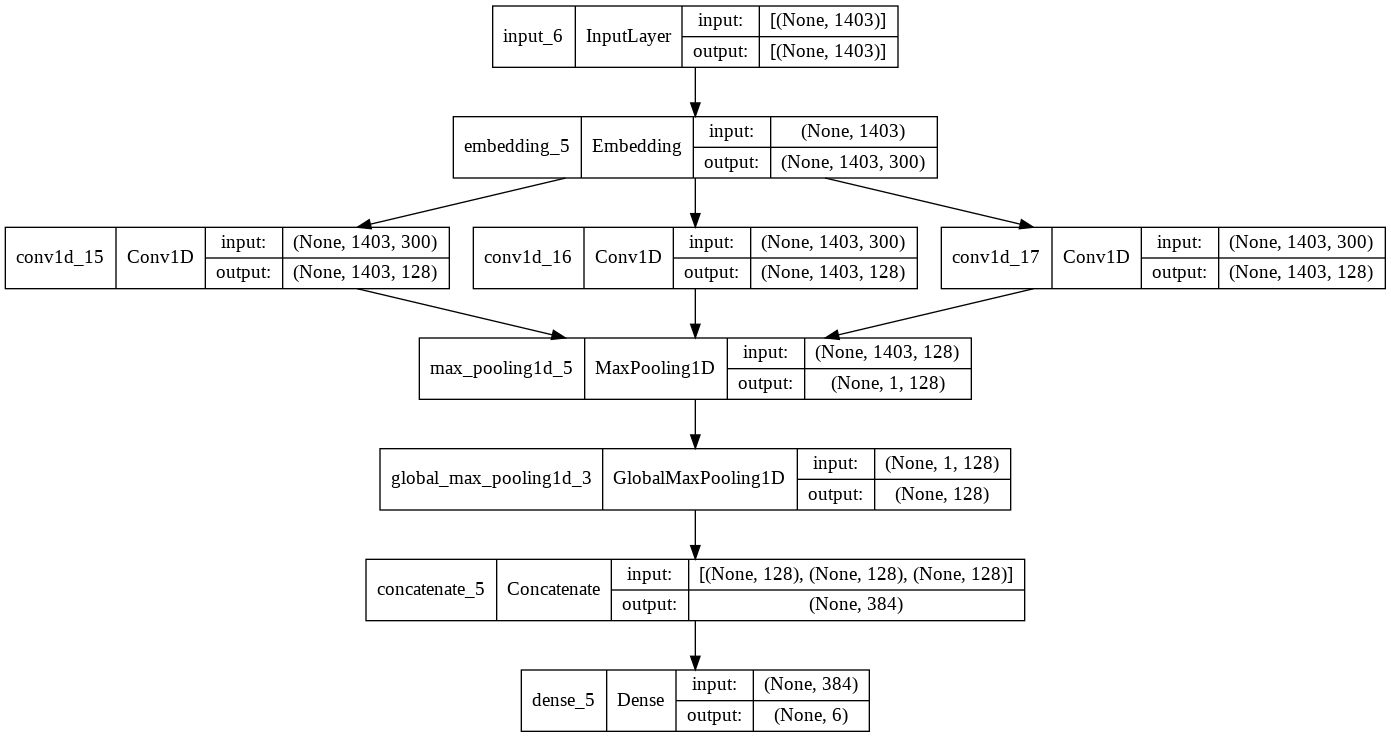

In [98]:
tf.keras.utils.plot_model(cnn_128_3_4_5, show_shapes=True)

In [91]:
cnn_128_3_4_5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1403)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1403, 300)    57064200    ['input_5[0][0]']                
                                                                                                  
 conv1d_12 (Conv1D)             (None, 1403, 128)    115328      ['embedding_4[0][0]']            
                                                                                                  
 conv1d_13 (Conv1D)             (None, 1403, 128)    153728      ['embedding_4[0][0]']            
                                                                                            

In [92]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=1,
    mode='min',
    verbose=1
)

cnn_128_3_4_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
)

history_cnn = cnn_128_3_4_5.fit(
    train_pad,
    train_y,
    epochs = 4,
    validation_data=(val_pad, val_y), 
    batch_size = 32,
    callbacks=[early_stopping]
)

Epoch 1/4
3990/3990 [==============================] - 1013s 253ms/step - loss: 0.0572 - val_loss: 0.0471
Epoch 2/4
3990/3990 [==============================] - 975s 244ms/step - loss: 0.0356 - val_loss: 0.0446
Epoch 3/4
3990/3990 [==============================] - 1012s 254ms/step - loss: 0.0243 - val_loss: 0.0492
Epoch 00003: early stopping


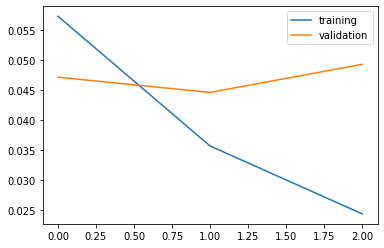

In [93]:
plot_learning_curve(history_cnn)

In [94]:
test_seq = tokenizer.texts_to_sequences(test_data.comment_texxxt)
# test_seq = tokenizer.texts_to_sequences(test_data.comment_texxt)
test_pad = pad_sequences(test_seq, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')

In [95]:
prepare_submit_file(cnn_128_3_4_5, test_pad, batch_size=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


                      id        toxic  ...       insult identity_hate
0       00001cee341fdb12      0.99998  ...      0.97822       0.68251
1       0000247867823ef7  8.72559e-05  ...  0.000109982   2.89765e-06
2       00013b17ad220c46    0.0454677  ...    0.0153318   0.000541179
3       00017563c3f7919a   0.00174947  ...  0.000386467   2.65024e-05
4       00017695ad8997eb  0.000190693  ...  0.000127964   1.67995e-05
...                  ...          ...  ...          ...           ...
153159  fffcd0960ee309b5     0.523648  ...    0.0159617    0.00175777
153160  fffd7a9a6eb32c16   0.00454002  ...   0.00144856   0.000151407
153161  fffda9e8d6fafa9e   0.00055395  ...  0.000511326   1.08511e-05
153162  fffe8f1340a79fc2  0.000658923  ...  0.000508347    0.00236184
153163  ffffce3fb183ee80     0.998876  ...     0.350625    0.00635764

[153164 rows x 7 columns]
